<a href="https://colab.research.google.com/github/Chrstphr1995/BDA_Project/blob/V2/Stock_Prices_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teil 1 der Story: Die Aktien

# 1 Die historischen Verläufe der Aktienkurse

# 1.1 Generierung und Abbildung der Aktienkurse

Als erstes bereiten wir das Setup für unsere Analyse vor.

Zunächst wird ein Package von Alpha Vantage installiert. Auf https://www.alphavantage.co/ lässt sich ein individueller API Key generieren. Durch diesen erhalten wir kostenlos Zugang zu historischen Kursdaten in Echzeit.

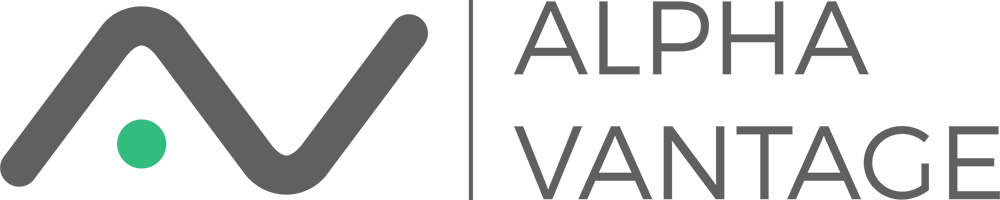


Die Anteilung für den Code stammt von [Youtube](https://www.youtube.com/watch?v=d2kXmWzfS0w). Dieser kann nicht 1:1 übernommen werden, sondern muss an manchen stellen angepasst werden.


In [1]:
pip install alpha_vantage

     |████████████████████████████████| 1.3MB 6.8MB/s 
     |████████████████████████████████| 296kB 37.6MB/s 
     |████████████████████████████████| 143kB 25.3MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=b2e2882d336586b5d60bad8e490a733c7928a4a0970f47cb39df3cc144a8fc28
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl


In [2]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time


Der generierte API Key von Alpha Vantage wird eingefügt.

In [3]:
api_key = "NMO1Y2U90QAJBJ2V"



---



Nun wird damit begonnen, die historischen Kursdaten zu generieren. An dieser Stelle wird der Code aus dem Youtube Video abgeändert. Ursprünglicher Code:

**ts = TimeSeries(key=api_key, output_format='pandas')**

--> Dieser Teil bleibt gleich. Es wird anhand des API_Keys auf die historischen Kurse zugegriffen.

--

**data_ts, meta_data_ts = ts.get_intraday(symbol='MSFT', interval='1min', outputsize='full')**

--> Im Youtube Video werden minutengenaue Kurse von Alpha Vantage importiert. Dementsprechend lautet die Funktion ts.get_intraday(...). 

--> Für unser Beispiel reicht der tagesaktuelle Schlusskurs der Aktien. Die Funktion wird umgeändert in ts.get_daily(...).

--> Mit dem Symbol ("MSFT") wird angegeben welche Kurse importiert werden sollen. In diesem fall sind es die Kurse der Microsoft Aktie. Das Symbol kann beliebig geändert werden (bspw. AAPL = Apple).

--> Outputsize gibt den zeitlichen Rahmen des Outputs an. In unserem Beispiel werden die Kurse seit dem Initial Public Offering der jeweiligen Aktie angezeigt.

In [4]:
ts = TimeSeries(key=api_key, output_format='pandas')
data_ts, meta_data_ts = ts.get_daily(symbol='MSFT', outputsize='full') 
                                     

In [5]:
ta = TimeSeries(key=api_key, output_format='pandas')
data_ta, meta_data_ta = ta.get_daily(symbol='AAPL', outputsize='full') 

In [6]:
te = TimeSeries(key=api_key, output_format='pandas')
data_te, meta_data_te = te.get_daily(symbol='GOOGL', outputsize='full')



---



Nachdem die Kurse der gewünschten Aktien importiert wurden, müssen diese in eine verwertbare Form gebracht werden.

Mit **df1 = data_ts; df2 = data_ta; df3 = data te** wird die obige Funktion vereinfacht. Mit **total_df = pd.concat([df1, df2, df3], axis=1)** werden die drei Aktienkurse zusammengefasst. Damit können sie mit **print(total_df)** in einer Tabelle abgebildet werden.

Ursprünglich würden die Werte der Tabelle "1. Open"; "2. High"; "3. Low"; "4. Close"; "5. Volume" beinhalten. Durch den Zusatz **['4. close']** wird der Output pro Aktie jedoch auf den Schlusskurs begrenzt. Dadurch wird die ausgegebene Tabelle übersichtlicher. Mit dem Zusatz ['5. Volume'] könnten bspw. die Handelsvolumen des jeweiligen Tages pro Aktie abgebildet werden.


In [7]:
#Microsoft
df1 = data_ts['4. close']

In [8]:
#Apple
df2 = data_ta['4. close']

In [9]:
#Alphabet
df3 = data_te['4. close']

In [10]:
total_df1 = pd.concat([df1, df2, df3], axis=1)

In [11]:
print(total_df1)

            4. close  4. close  4. close
date                                    
1999-11-01     92.37     77.62       NaN
1999-11-02     92.56     80.25       NaN
1999-11-03     92.00     81.50       NaN
1999-11-04     91.75     83.62       NaN
1999-11-05     91.56     88.31       NaN
...              ...       ...       ...
2020-12-24    222.75    131.97   1734.16
2020-12-28    224.96    136.69   1773.96
2020-12-29    224.15    134.87   1757.76
2020-12-30    221.68    133.72   1736.25
2020-12-31    222.42    132.69   1752.64

[5327 rows x 3 columns]




---



Mit **matplotlib.pyplot** werden die obenstehenden Daten in einer Grafik visualisiert. Durch die Zusammenfassung der einzelnen Funktionen df1, df2 und df3 zu total_df werden die Schlusskurse aller drei Aktien abgebildet.

Besonderheit: Sowohl bei Apple, als auch bei Alphabet ist 2014 und im August 2020 ein starker Einbruch zu verzeichnen. Der Aktienkurs an sich ist jedoch nicht eingebrochen. Zu diesen Zeitpunkten wurde ein Aktiensplit durchgeführt. Wer beispielsweise am 31.07.2020 eine Apple Aktie im Wert von 400 Dollar besessen hat, hatte am 01.08.2020 vier Aktien im Wert von je 100 Dollar in seinem Portfolio. Dementsprechend sank der Schlusskurs von 400 Dollar auf 100 Dollar, ohne dass sich für die Aktionäre Einbußen auftaten.

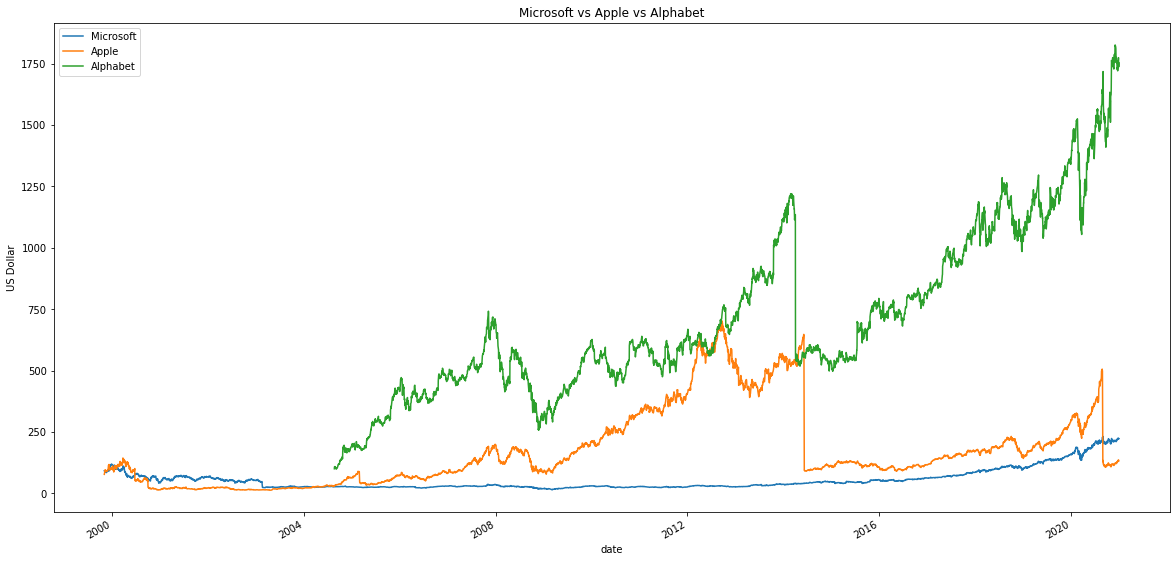

In [18]:
import matplotlib.pyplot as plt
from pylab import rcParams

total_df1.plot()
plt.title("Microsoft vs Apple vs Alphabet")
plt.xlabel("date")
plt.ylabel("US Dollar")
plt.legend(["Microsoft", "Apple", "Alphabet"])
rcParams['figure.figsize'] = 10, 20
plt.show()


# Blau: Microsoft
# Orange: Apple
# Grün: Alphabet



---



Wer Interesse hat und mit den Daten außerhalb von Python weiterarbeiten möchte, kann sich mit folgendem Code eine Date exportieren lassen. Im Beispiel wird durch **df.to_csv('MAG_Close.csv')** eine CSV Datei generiert. Diese kann direkt aus Google Colab gedownloadet und lokal weiterbearbeitet werden. Wird der Code umgeschrieben (**df.to_excel('MAG_Close.xlsx'**), wird eine Excel-Datei generiert. Wer nicht mit Python arbeiten möchte, kann die Daten nun mit Programmen wie Tableau (free for students: https://www.tableau.com/de-de/academic/students) oder Microsoft Power BI (nicht für MacOS User) weiter bearbeiten und visualisieren.

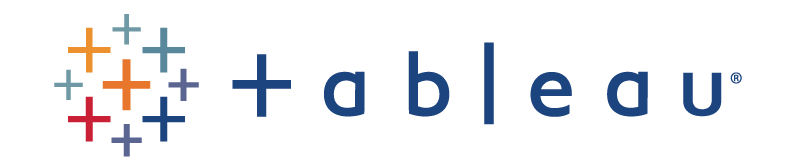

Source for Code: https://www.geeksforgeeks.org/python-save-list-to-csv/

In [ ]:
import pandas as pd

df = pd.DataFrame(total_df)

df.to_csv('MAG_Close.csv')



---



# 1.2 Microsoft - Eine genaue Betrachtung

Da die Kurse von Microsoft, Apple und Alphabet sehr eng miteinander korrelieren (Ausnahme Aktiensplit), wird folgend mit Microsoft als Referenzaktie weitergearbeitet. Dadurch werden die grafischen Darstellungen ebenfalls vereinfacht, weil sich nicht mehr verschiedene Kursdaten innerhalb einer Grafik befinden.

Das Vorgehen für die Generierung der Schlusskurse ist identisch zu *1.1 Generierung und Abbildung der Aktienkurse*

In [22]:
ts = TimeSeries(key=api_key, output_format='pandas')
data_ts, meta_data_ts = ts.get_daily(symbol='MSFT', outputsize='full')

In [23]:
df1 = data_ts['4. close']

Im Vergleich zu *1.1 Generierung und Abbildung der Aktienkurse* wird hier anstelle von total_df = pd.concat([df1, df2, df3], axis=1) nur **total_df = pd.concat([df1], axis=1)** benutzt, da nur eine Aktie betrachtet wird.

In [24]:
total_df = pd.concat([df1], axis=1)

In [25]:
print(total_df)

            4. close
date                
2020-12-31    222.42
2020-12-30    221.68
2020-12-29    224.15
2020-12-28    224.96
2020-12-24    222.75
...              ...
1999-11-05     91.56
1999-11-04     91.75
1999-11-03     92.00
1999-11-02     92.56
1999-11-01     92.37

[5327 rows x 1 columns]


In [26]:
import pandas as pd

df = pd.DataFrame(df1)

df.to_csv('Microsoft_Close.csv')

In [27]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import plotly.express as px

In [28]:
df = pd.read_csv('/content/Microsoft_Close.csv')

fig = go.Figure([go.Scatter(x=df['date'], y=df['4. close'])])

fig.update_layout(title='Stock Prices of Microsoft till today')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [193]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

In [194]:
api_key = "NMO1Y2U90QAJBJ2V"

In [195]:
ts = TimeSeries(key=api_key, output_format='pandas')
data_ts, meta_data_ts = ts.get_daily(symbol='MSFT', outputsize='full')

In [196]:
ti = TechIndicators(key=api_key, output_format='pandas')
data_ti, meta_data_ti = ti.get_sma(symbol='MSFT', series_type='close')

In [197]:
df1 = data_ts['4. close']
df2 = data_ti
total_df = pd.concat([df1, df2], axis=1)

In [198]:
print(total_df)

            4. close       SMA
date                          
1999-11-01     92.37       NaN
1999-11-02     92.56       NaN
1999-11-03     92.00       NaN
1999-11-04     91.75       NaN
1999-11-05     91.56       NaN
...              ...       ...
2020-12-24    222.75  216.5640
2020-12-28    224.96  217.0505
2020-12-29    224.15  217.5545
2020-12-30    221.68  217.8280
2020-12-31    222.42  218.1805

[5327 rows x 2 columns]


In [200]:
import pandas as pd

df = pd.DataFrame(total_df)

df.to_json('Microsoft_CloseSMA.json')

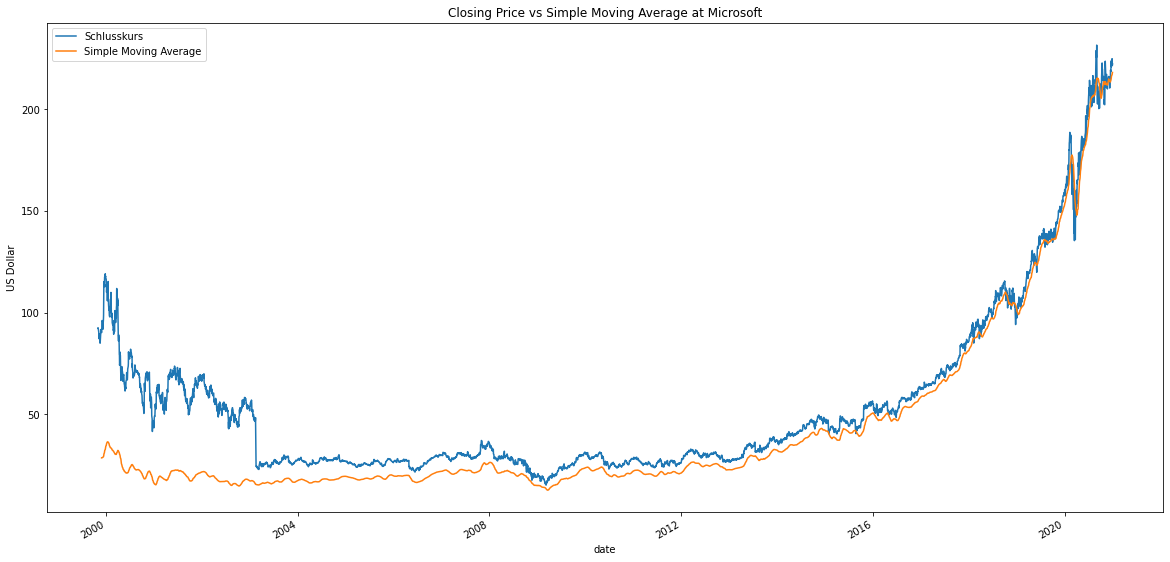

In [140]:
import matplotlib.pyplot as plt
from pylab import rcParams

total_df.plot()
plt.title("Closing Price vs Simple Moving Average at Microsoft")
plt.xlabel("date")
plt.ylabel("US Dollar")
plt.legend(["Schlusskurs", "Simple Moving Average"])
rcParams['figure.figsize'] = 10, 20
plt.show()